In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('lbp.csv')
df_dates=pd.to_datetime(df['Date'])
cols = list(df)[1:10]
df1 = df[cols].astype(float)
# df1

In [171]:
df2=np.array(df1)
data = df2.reshape(28,4,9)
# data

In [172]:
train_data1, test_data1 = train_test_split(data, test_size=0.53, shuffle=False)
# train_data1.shape,test_data1.shape

In [173]:
train_data=train_data1[:,:,:-1]
train_data_o=train_data1[:,-1,-1]
test_data=test_data1[:,:,:-1]
test_data_o=test_data1[:,-1,-1]
train_data.shape,train_data_o.shape,test_data.shape,test_data_o.shape

((13, 4, 8), (13,), (15, 4, 8), (15,))

In [174]:
train_data_flattened=train_data.reshape((train_data.shape[0],train_data.shape[1]*train_data.shape[2]))
test_data_flattened=test_data.reshape((test_data.shape[0],test_data.shape[1]*test_data.shape[2]))
train_data_flattened.shape,test_data_flattened.shape

((13, 32), (15, 32))

In [175]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_x=scaler.fit_transform(train_data_flattened)
train_y=scaler.fit_transform(train_data_o.reshape(-1,1)).reshape(train_data_o.shape)
test_x=scaler.fit_transform(test_data_flattened)
test_y=scaler.fit_transform(test_data_o.reshape(-1,1)).reshape(test_data_o.shape)

In [176]:
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(train_x,train_y)

Y_pred = regressor.predict(test_x)
Y_pred_rescale=scaler.inverse_transform(Y_pred.reshape(-1,1))
test_y_rescale=scaler.inverse_transform(test_y.reshape(-1,1))
Y_pred_rescale,test_y_rescale

(array([[40.09241667],
        [40.121125  ],
        [40.116     ],
        [40.10554167],
        [40.10566667],
        [40.07266667],
        [40.10175   ],
        [40.094875  ],
        [40.11045833],
        [40.07541667],
        [40.08079167],
        [40.08133333],
        [40.05658333],
        [40.116625  ],
        [40.10616667]]),
 array([[40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9]]))

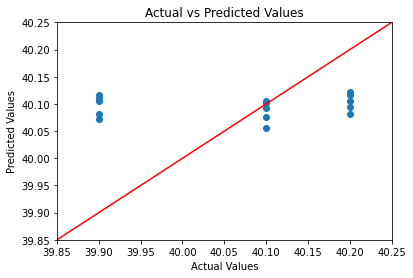

MSE:  0.016404194212963474
RMSE:  0.1280788593522111


In [177]:
x_range=[39.85,40.25]
y_range=[39.85,40.25]
plt.xlim(x_range)
plt.ylim(y_range)
plt.plot(x_range, y_range, color='red')
plt.scatter(test_y_rescale,Y_pred_rescale)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
mse = mean_squared_error(test_y_rescale,Y_pred_rescale)
rmse = np.sqrt(mse)
print("MSE: ",  mse)
print("RMSE: ", rmse)